In [1]:
import pandas as pd
import numpy as np


In [5]:
df = pd.read_csv('titanic.csv', '\t')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.drop(columns=['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket','Cabin','Embarked'], axis='columns', inplace=True)

In [9]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500
...,...,...,...,...,...
886,0,2,1,27.0,13.0000
887,1,1,0,19.0,30.0000
888,0,3,0,NaN,23.4500
889,1,1,1,26.0,30.0000


In [13]:
inputs = df.drop('Survived', axis='columns')
target = df['Survived']

In [16]:
# we need to check if there are any NaN values:

In [17]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [18]:
inputs.isna().any()

Pclass    False
Sex       False
Age        True
Fare      False
dtype: bool

In [19]:
# lets fill them with mean

In [23]:
mean_age = inputs['Age'].mean()
mean_age


29.69911764705882

In [31]:
inputs.fillna({'Age':mean_age}, inplace=True)

In [24]:
# now lets splot the data set in train and test

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [27]:
# now we shall use the bayes algorithm, there are many... and depending on the data set se shall choose which one
# In this case, we have chosen Gaussian

In [48]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [49]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8100558659217877

In [50]:
from sklearn.metrics import confusion_matrix

y_predict = model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
cm

array([[105,  16],
       [ 18,  40]])

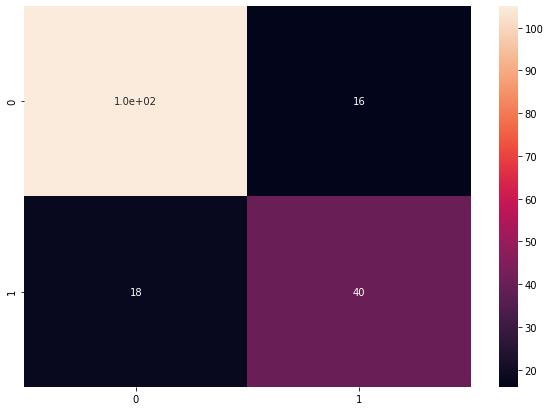

In [52]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)


In [53]:
# lets try k fold on this

In [65]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(GaussianNB(), inputs, target, cv=20)

In [66]:
meanscore = sum(scores)/len(scores)
meanscore

0.7765656565656565